## Analyzing the Startup World: Analysis, Visualizations & Data Cleaning
### Chris Tarzian
##### https://www.kaggle.com/datasets/justinas/startup-investments?select=ipos.csv

#### The code below is a data analysis deep dive into the Startup space. <br><br> The dataset initially involves four different csv's that are ultimately merged together to create a 'final_startup' dataset where the bulk of the analysis is done. <br><br> I utilized various methods of data cleaning, data munging, and data visualizations in matplotlib and seaborn and there is accompanying analysis and insights based on it.

In [1]:
import re
import os
import pandas as pd
import numpy as np
from functools import reduce
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
objects = pd.read_csv("objects.csv")
acquisitions = pd.read_csv("acquisitions.csv")
acquisitions = acquisitions.set_index('id')
ipos = pd.read_csv("ipos.csv")
ipos = ipos.set_index('id')
funding_rounds = pd.read_csv("funding_rounds.csv")
funding_rounds = funding_rounds.set_index('id')

c:\Users\Chris Tarzian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## <span style='color:Green '> Data Preprocessing </span> 

Renaming column 'id' to 'object_id' to make it a smoother transition to merge the 4 files

In [3]:
objects = objects.rename(columns={'id':'object_id'})
objects.entity_type.value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

Removing various columns throughout each of the five datasets that are not adding much value


In [4]:
objects = objects.drop(columns=['normalized_name','relationships','entity_id','closed_at','logo_width','parent_id','permalink','domain','homepage_url','twitter_username','logo_url','logo_height','short_description','description','overview','tag_list','invested_companies', 'last_investment_at', 'first_milestone_at','last_milestone_at', 'milestones','created_by'])
ipos = ipos.drop(columns=['source_url','source_description', 'created_at', 'updated_at'])
acquisitions = acquisitions.rename(columns={'acquired_object_id':'object_id'})
acquisitions = acquisitions.drop(columns=['source_url','source_description', 'created_at', 'updated_at'])
funding_rounds = funding_rounds.drop(columns=['source_url','source_description', 'created_at', 'created_by', 'updated_at'])

Filtering dataset to just focus on Startup Companies

In [5]:
c_filter = objects['entity_type'] == 'Company'
new_objects = objects[c_filter]

Merging (or joining) the datasets on 'object_id'

In [6]:
final_startup = new_objects.merge(ipos,on='object_id', how='left').merge(acquisitions,on='object_id',how='left').merge(funding_rounds,on='object_id',how='left')

More data cleaning data manipulation

In [7]:
final_startup = final_startup.drop(columns = ['raised_amount_x','raised_currency_code_x', 'raised_amount_y','updated_at', 'pre_money_valuation_usd', 'post_money_valuation_usd'])
final_startup.rename(columns={'status':'stage','raised_currency_code_y': 'raised_currency_code', 'raised_amount_usd':'raised_amount', 'funding_total_usd': 'funding_total'}, inplace=True)
final_startup['founded_at'] = pd.to_datetime(final_startup['founded_at'])
final_startup['public_at'] = pd.to_datetime(final_startup['public_at']) 
final_startup['acquired_at'] = pd.to_datetime(final_startup['acquired_at'])
final_startup['first_investment_at'] = pd.to_datetime(final_startup['first_investment_at'])
final_startup['first_funding_at'] = pd.to_datetime(final_startup['first_funding_at'])
final_startup['last_funding_at'] = pd.to_datetime(final_startup['last_funding_at'])
final_startup['created_at'] = pd.to_datetime(final_startup['created_at'])
final_startup['funded_at'] = pd.to_datetime(final_startup['funded_at'])

## <span style='color:Green '> Deeper Understanding of 'final_startup' Dataset </span> 

In [141]:
final_startup.head()

,object_id,entity_type,name,category_code,stage,founded_at,country_code,state_code,city,region,...,funding_round_code,raised_amount,raised_currency_code,pre_money_valuation,pre_money_currency_code,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round
0,c:1,Company,Wetpaint,web,operating,2005-10-17,USA,WA,Seattle,Seattle,...,a,5250000.0,USD,0.0,NaN,0.0,NaN,2.0,0.0,1.0
1,c:1,Company,Wetpaint,web,operating,2005-10-17,USA,WA,Seattle,Seattle,...,b,9500000.0,USD,0.0,NaN,0.0,NaN,3.0,0.0,0.0
2,c:1,Company,Wetpaint,web,operating,2005-10-17,USA,WA,Seattle,Seattle,...,c,25000000.0,USD,0.0,NaN,0.0,NaN,4.0,1.0,0.0
3,c:10,Company,Flektor,games_video,acquired,NaT,USA,CA,Culver City,Los Angeles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c:100,Company,There,games_video,acquired,NaT,USA,CA,San Mateo,SF Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
final_startup.shape

(217669, 41)

Quite a large dataset with all the tables combined. Consists of over 41 different columns and 217k+ rows

In [8]:
final_startup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217669 entries, 0 to 217668
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   object_id                 217669 non-null  object        
 1   entity_type               217669 non-null  object        
 2   name                      217669 non-null  object        
 3   category_code             144059 non-null  object        
 4   stage                     217669 non-null  object        
 5   founded_at                110105 non-null  datetime64[ns]
 6   country_code              108775 non-null  object        
 7   state_code                67397 non-null   object        
 8   city                      104406 non-null  object        
 9   region                    217669 non-null  object        
 10  first_investment_at       2842 non-null    datetime64[ns]
 11  investment_rounds         217669 non-null  int64         
 12  fi

In [120]:
final_startup.columns

Index(['object_id', 'entity_type', 'name', 'category_code', 'stage',
       'founded_at', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total', 'created_at',
       'ipo_id', 'valuation_amount', 'valuation_currency_code', 'public_at',
       'stock_symbol', 'acquisition_id', 'acquiring_object_id', 'term_code',
       'price_amount', 'price_currency_code', 'acquired_at',
       'funding_round_id', 'funded_at', 'funding_round_type',
       'funding_round_code', 'raised_amount', 'raised_currency_code',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation', 'post_money_currency_code', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [9]:
final_startup.describe()

,investment_rounds,funding_rounds,funding_total,ipo_id,valuation_amount,acquisition_id,price_amount,funding_round_id,raised_amount,pre_money_valuation,post_money_valuation,participants,is_first_round,is_last_round
count,217669.000000,217669.000000,2.176690e+05,2034.000000,2.034000e+03,11915.000000,1.191500e+04,52724.000000,5.272400e+04,5.272400e+04,5.272400e+04,52724.000000,52724.000000,52724.000000
mean,0.037833,0.612857,6.006689e+06,739.376598,9.694345e+08,5465.568611,3.349173e+08,29004.548270,7.864363e+06,3.303791e+05,1.460569e+06,1.532755,0.603520,0.603444
std,1.961902,1.434067,4.893022e+07,383.524479,8.759620e+09,3010.331609,2.383336e+10,16803.427089,3.860460e+07,6.544426e+07,7.487608e+07,2.063832,0.489171,0.489187
min,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,405.000000,0.000000e+00,2923.000000,0.000000e+00,14419.750000,2.500000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000e+00,780.000000,0.000000e+00,5509.000000,0.000000e+00,28941.500000,1.600000e+06,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000e+00,1072.750000,0.000000e+00,8065.500000,6.145000e+06,43582.250000,6.750000e+06,0.000000e+00,0.000000e+00,2.000000,1.000000,1.000000
max,478.000000,15.000000,5.700000e+09,1376.000000,1.089600e+11,10529.000000,2.600000e+12,57952.000000,3.835050e+09,1.500000e+10,1.000000e+10,36.000000,1.000000,1.000000


In [161]:
final_startup.corr()

,investment_rounds,funding_rounds,funding_total,ipo_id,valuation_amount,acquisition_id,price_amount,funding_round_id,raised_amount,pre_money_valuation,post_money_valuation,participants,is_first_round,is_last_round
investment_rounds,1.000000,0.008846,0.011576,-0.163557,0.089502,-0.024474,0.036347,-0.008267,0.009054,0.003409,0.000694,0.011636,-0.004241,-0.004828
funding_rounds,0.008846,1.000000,0.371083,0.171203,0.180760,0.179813,-0.005781,-0.070717,0.066540,0.020417,0.025673,0.096914,-0.551751,-0.552462
funding_total,0.011576,0.371083,1.000000,-0.011916,0.430069,0.035583,-0.000622,-0.075423,0.628079,0.112464,0.062282,0.086161,-0.147518,-0.148057
ipo_id,-0.163557,0.171203,-0.011916,1.000000,-0.008664,0.234463,-0.031735,0.274481,-0.103859,0.005342,0.036098,-0.016879,-0.099860,-0.100609
valuation_amount,0.089502,0.180760,0.430069,-0.008664,1.000000,-0.061029,-0.036938,-0.122266,0.087092,0.271657,0.006588,0.027234,-0.051731,-0.052115
acquisition_id,-0.024474,0.179813,0.035583,0.234463,-0.061029,1.000000,0.000696,0.376416,-0.005046,-0.012409,0.005246,-0.059358,-0.055589,-0.058124
price_amount,0.036347,-0.005781,-0.000622,-0.031735,-0.036938,0.000696,1.000000,0.007747,0.056268,0.004819,-0.000608,0.004697,-0.053579,-0.053087
funding_round_id,-0.008267,-0.070717,-0.075423,0.274481,-0.122266,0.376416,0.007747,1.000000,-0.034861,-0.008425,0.014949,-0.220273,0.195452,-0.041072
raised_amount,0.009054,0.066540,0.628079,-0.103859,0.087092,-0.005046,0.056268,-0.034861,1.000000,0.026543,0.057895,0.071789,-0.008052,-0.052520
pre_money_valuation,0.003409,0.020417,0.112464,0.005342,0.271657,-0.012409,0.004819,-0.008425,0.026543,1.000000,-0.000001,-0.000716,-0.005416,-0.006179


## <span style='color:Green '> Exploratory Analysis </span> 

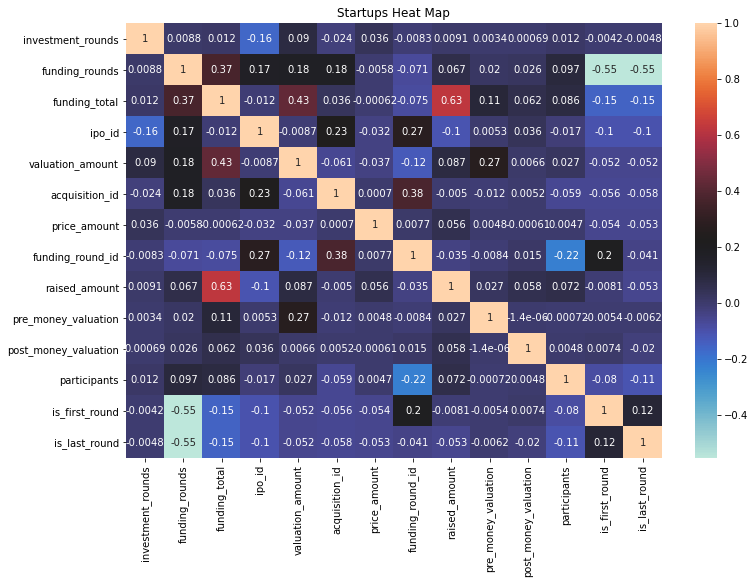

In [156]:
plt.figure(figsize=(12,8))
sns.heatmap(final_startup.corr(), annot=True,cmap='icefire').set_title('Startups Heat Map')
plt.show();

A quick look at  the heatmap above sheds a few interesting tidbits. One being the more money raised ('raised_amount') the stronger the correlation to 'funding_total.' Another variable correlated with 'funding_total' was 'valuation_amount'; this leads one to believe that the companies that are successful, typically recieve greater amounts of funding and then in turn are viewed as more valuable. Another seemingly important correlation to make note of is 'ipo_id' and 'funding_rounds' which indicates the greater amount of funding rounds a company has gone through over the course of its life the more likely it will IPO and go public.

In [12]:
## removing unatributted for the chart below to get a clearer picture of the clean data
funding_round_df = final_startup.loc[final_startup['funding_round_code'] != 'unattributed']

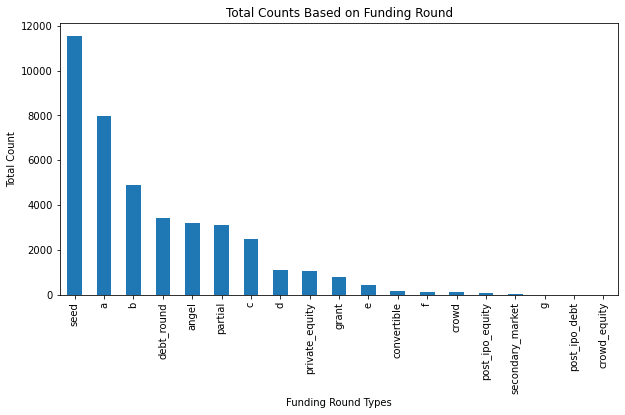

In [160]:
plt.rcParams["figure.figsize"] = (10,5)
funding_round_df['funding_round_code'].value_counts().plot(kind='bar')
plt.xlabel("Funding Round Types")
plt.ylabel("Total Count")
plt.title("Total Counts Based on Funding Round")
plt.show();

After removing 'unattributed', the early stages of funding round are most present here. One interesting thing to note is Angel Rounds are less common than Series A or Series B. Furthermore, the risk of a company's status being 'closed' decreases as it continues further down the funding round line.

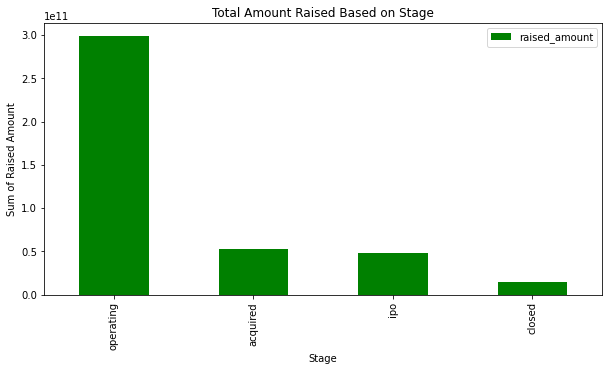

In [159]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.groupby('stage').agg({'raised_amount':'sum'}).sort_values(by='raised_amount', ascending=False).plot(kind='bar', color=('green'))
plt.xlabel("Stage")
plt.ylabel("Sum of Raised Amount")
plt.title("Total Amount Raised Based on Stage")
plt.show();

'Operating' startups easily pace the group in terms of total investment money raised. But maybe the sum is not telling the whole story. May need to get the mean or median to see what each startup stage typically sees in terms of investment money

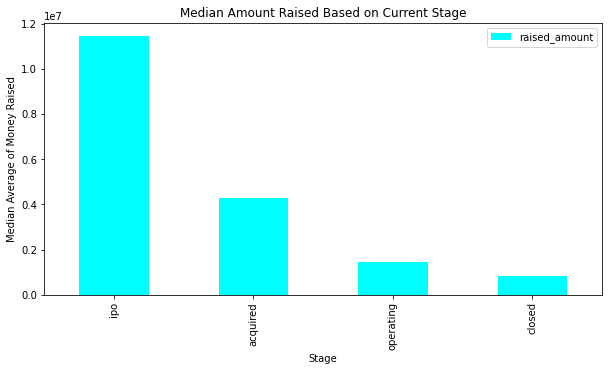

In [152]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.groupby('stage').agg({'raised_amount':'median'}).sort_values(by='raised_amount', ascending=False).plot(kind='bar', color=['cyan'])
plt.xlabel("Stage")
plt.ylabel("Median Average of Money Raised")
plt.title("Median Amount Raised Based on Current Stage")
plt.show();

The graph above paints quite a different picture than the one before. Here one can see that both the companies that 'ipo' or are 'acquired' recieve significantly more funding on average than those that are still 'operating' or have 'closed.' This may be simply explained by the fact that the further a startup progresses through the Status stages, the more funding it will recieve over time.

In [17]:
final_startup.groupby('stage').agg({'funding_rounds': 'mean', 'funding_total' : 'mean', 'investment_rounds' : 'mean',  'raised_amount':'mean', 'participants' :'mean'})

,funding_rounds,funding_total,investment_rounds,raised_amount,participants
stage,,,,,
acquired,1.161141,1.363798e+07,0.026018,1.056562e+07,2.359920
closed,1.610635,1.030379e+07,0.005318,5.029293e+06,1.347405
ipo,2.940520,1.071642e+08,0.642061,3.867669e+07,1.464084
operating,0.541564,4.530516e+06,0.033409,6.865512e+06,1.451813


In [18]:
final_startup.category_code.value_counts().head(10)

software       20776
web            16601
other          13847
ecommerce       9972
mobile          8407
games_video     8301
advertising     7211
biotech         7188
enterprise      6069
consulting      5108
Name: category_code, dtype: int64

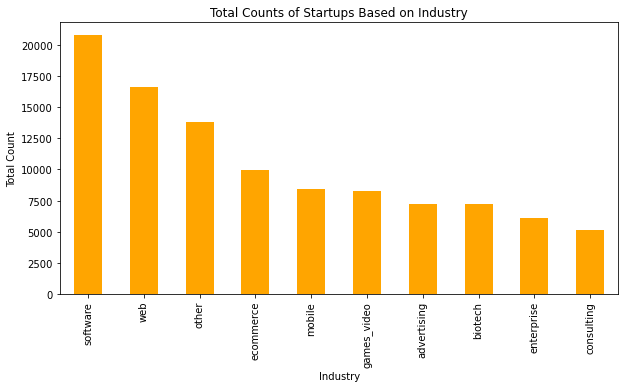

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.category_code.value_counts().head(10).plot(kind='bar', color ='orange')
plt.xlabel("Industry")
plt.ylabel("Total Count")
plt.title("Total Counts of Startups Based on Industry")
plt.show();

Software, web and e-commerce seem to have the greatest number of entrants into the startup space.

In [138]:
final_startup.groupby(['stage','category_code']).agg({'raised_amount':'sum'}).sort_values(by='raised_amount', ascending=False).head(20)

raised_amount
stage     category_code                 
operating biotech           4.868903e+10
          software          3.137894e+10
          cleantech         2.827570e+10
          enterprise        1.732079e+10
          ecommerce         1.490591e+10
          mobile            1.348805e+10
          medical           1.152824e+10
          web               1.143117e+10
          hardware          1.044469e+10
acquired  mobile            9.955572e+09
ipo       biotech           9.710734e+09
operating advertising       9.304776e+09
          games_video       9.262108e+09
          network_hosting   8.987069e+09
          semiconductor     7.388409e+09
          health            7.256323e+09
acquired  software          6.991774e+09
operating finance           6.667666e+09
acquired  biotech           6.297061e+09
operating analytics         6.219684e+09

As we dig deeper, we can see which industries have raised the most money based on what stage the stage they are in. 'BioTech' is a leader in total money raised for 'operating', 'ipo' and 'acquired' stages. This leads one to believe the 'biotech' space is quite lucrative. Furthermore, 'mobile' has recieved significant funding whether the company is in the 'operating' or 'acquired' stage.

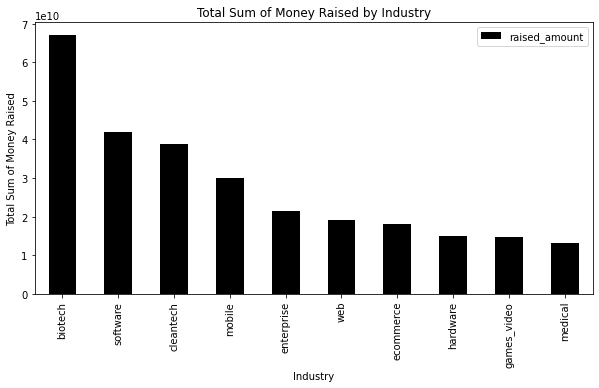

In [27]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.groupby(['category_code']).agg({'raised_amount':'sum'}).sort_values(by='raised_amount', ascending=False).head(10).plot(kind='bar', color='black')
plt.xlabel("Industry")
plt.ylabel("Total Sum of Money Raised")
plt.title("Total Sum of Money Raised by Industry")
plt.show();

'Biotech' then 'software', 'cleantech' and 'mobile' are all leading the charge in terms of total money raised. Interestingly, 'biotech', 'web' and 'social' all seem to have a higher than normal percentage of startups going IPO.

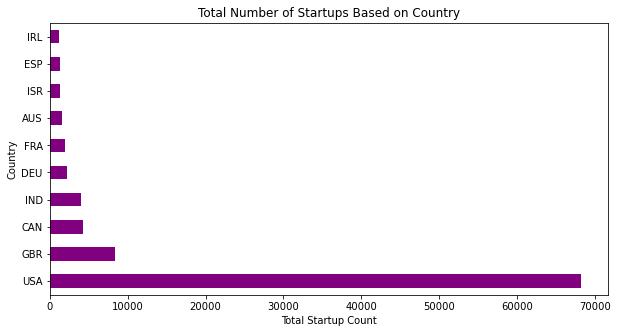

In [29]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.country_code.value_counts().head(10).plot(kind='barh', title='Top Startup Cities', color ='purple')
plt.xlabel("Total Startup Count")
plt.ylabel("Country")
plt.title("Total Number of Startups Based on Country")
plt.show();

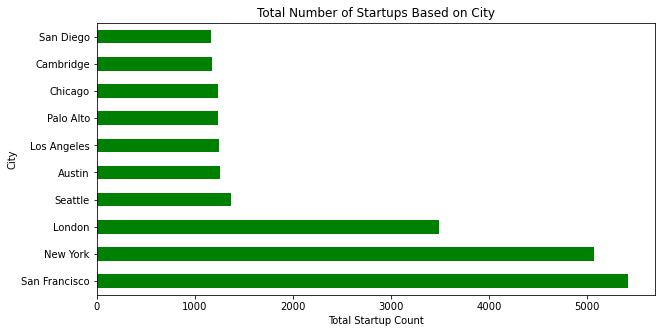

In [31]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.city.value_counts().head(10).plot(kind='barh', title='Top Startup Cities', color ='green')
plt.xlabel("Total Startup Count")
plt.ylabel("City")
plt.title("Total Number of Startups Based on City")
plt.show();

The USA is overwhelmingly the leader in terms of the amount of startups it has welcomed over the years. Furthermore, the cities with the greatest amount of startups includes all American cities in the top ten besides London. The list is notably led by San Francisco and New York followed by London and Seattle.

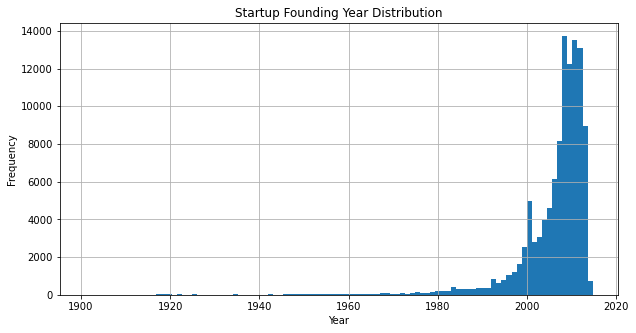

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.founded_at.hist(bins=100)
plt.title('Startup Founding Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show();

Startups for the most part exploded in popularity during the turn of the century. Startups reached their apex in the mid-2000's. Much of this gowth as been spurred by the proliferation of the internet and tech.

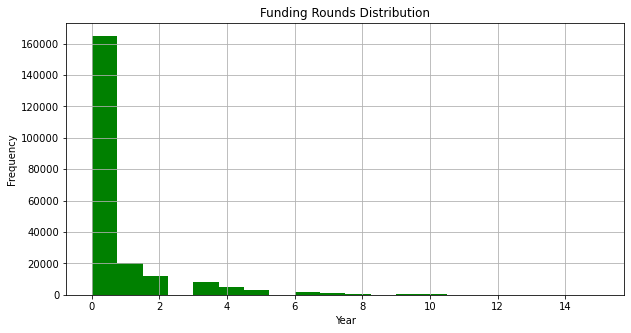

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
final_startup.funding_rounds.hist(bins=20, color='green')
plt.title('Funding Rounds Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show();

In [41]:
final_startup['stage'].value_counts()

operating    200486
acquired      11915
closed         3385
ipo            1883
Name: stage, dtype: int64

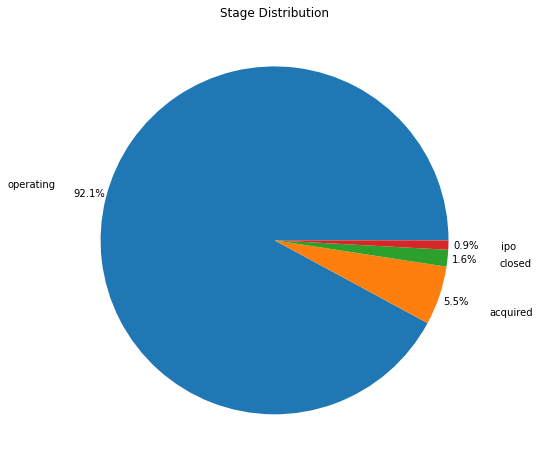

In [102]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rcParams["figure.figsize"] = (10,8)
#plt.set_facecolor('white')
plt.pie(final_startup['stage'].value_counts(), 
    labels=['operating', 'acquired', 'closed', 'ipo'], 
    #set_facecolor = 'y',
    autopct='%1.1f%%',
    pctdistance=1.1, 
    labeldistance=1.3,
    )
plt.title('Stage Distribution')
plt.show();

The overwhelmingly majority of startups remain in the 'operating' stage based off of this dataset. The holy grail for most startups and where the massive payday comes from occurs when a startup goes IPO. However, less than 1% of startups based on this dataset go IPO. This is good knowledge to have for a Startup founder. Focus your efforts on acquiring the necessary funds to get your startup off the ground and continue to build and grow your company. 

In [103]:
final_startup.to_csv("final_startup.csv", index=False)